In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cls_jaime = np.loadtxt("jaime_cls.txt")

In [3]:
cls_carlos = np.load("/home/jaime/PhD/LimberJack.jl/chains/cl_cross_corr_v3_DES_2/cl_cross_corr_bestfit_info_nointerp_EH_noconv.npz")

In [4]:
files = np.load("../data/DESY1_cls/Cls_meta.npz")

# 1st test

In [5]:
len(cls_jaime) == len(cls_carlos['cls'])

True

# Plots

In [6]:
lengths_gcgc = []
for i in range(0,5):
    lengths_gcgc.append(len(files["ls_1{}1{}".format(i,i)]))

In [7]:
lengths_gcwl = []
for i in range(0,5):
    for j in range(0,4):
        lengths_gcwl.append(len(files["ls_1{}2{}".format(i,j)]))

In [8]:
lengths_wlwl = []
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            lengths_wlwl.append(len(files["ls_2{}2{}".format(i,j)]))

In [9]:
lengths = np.concatenate([[0], lengths_gcgc, lengths_gcwl, lengths_wlwl])
idx = np.cumsum(lengths)
idx

array([  0,   5,  13,  23,  34,  47,  52,  57,  62,  67,  75,  83,  91,
        99, 109, 119, 129, 139, 150, 161, 172, 183, 196, 209, 222, 235,
       259, 283, 307, 331, 355, 379, 403, 427, 451, 475])

In [29]:
data = files["cls"]
err = np.sqrt(np.diag(files["cov"]))

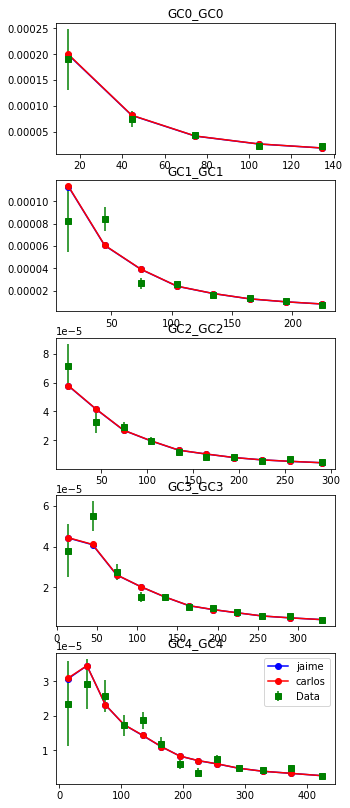

5


In [31]:
figure, axis = plt.subplots(5, figsize=(5,14))
l = 0
for i in range(0,5):
    axis[i].errorbar(files["ls_1{}1{}".format(i,i)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
    axis[i].plot(files["ls_1{}1{}".format(i,i)],
                    cls_jaime[idx[l]:idx[l+1]],
                 "bo-", label="jaime")
    axis[i].plot(files["ls_1{}1{}".format(i,i)],
                    cls_carlos['cls'][idx[l]:idx[l+1]],
                 "ro-", label="carlos")
    axis[i].set_title("GC{}_GC{}".format(i,i))
    l += 1
plt.legend()
plt.show()
print(l)

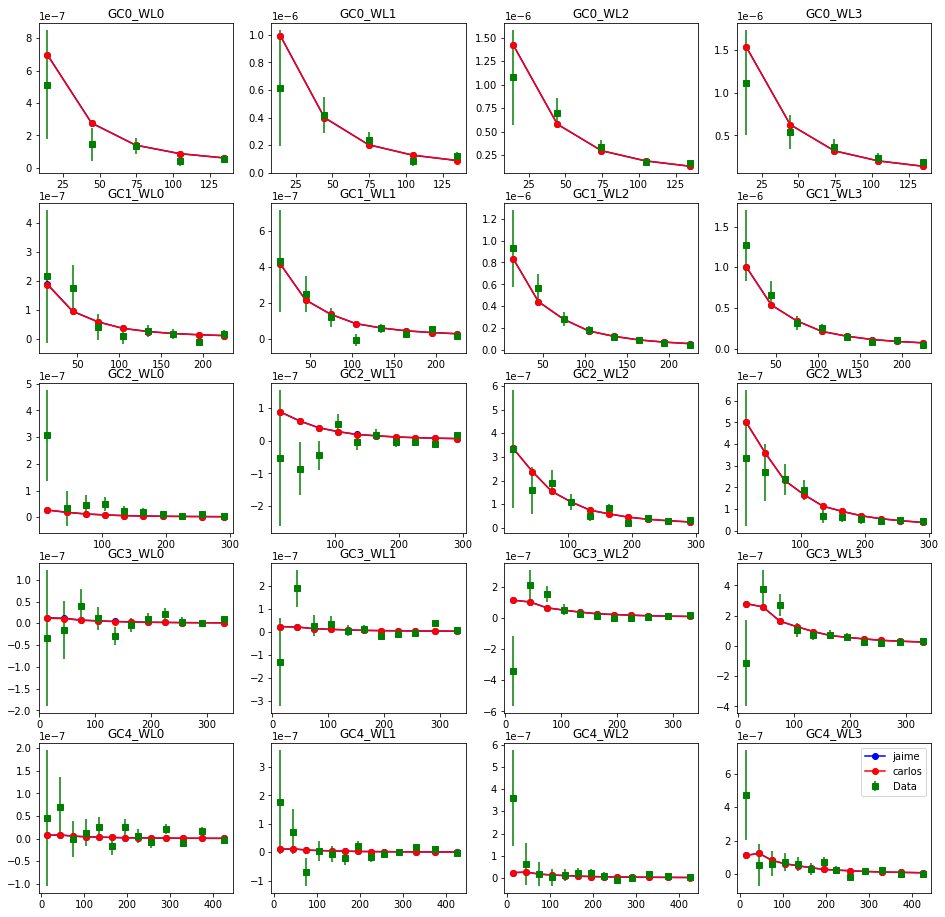

In [32]:
figure, axis = plt.subplots(5, 4, figsize=(16,16))
l = 5
for i in range(0,5):
    for j in range(0,4):
        axis[i, j].errorbar(files["ls_1{}2{}".format(i,j)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
        axis[i, j].plot(files["ls_1{}2{}".format(i,j)],
                        cls_jaime[idx[l]:idx[l+1]],
                        "bo-", label="jaime")
        axis[i, j].plot(files["ls_1{}2{}".format(i,j)],
                        cls_carlos['cls'][idx[l]:idx[l+1]],
                        "ro-", label="carlos")
        axis[i, j].set_title("GC{}_WL{}".format(i,j))
        l += 1
plt.legend()
plt.show()

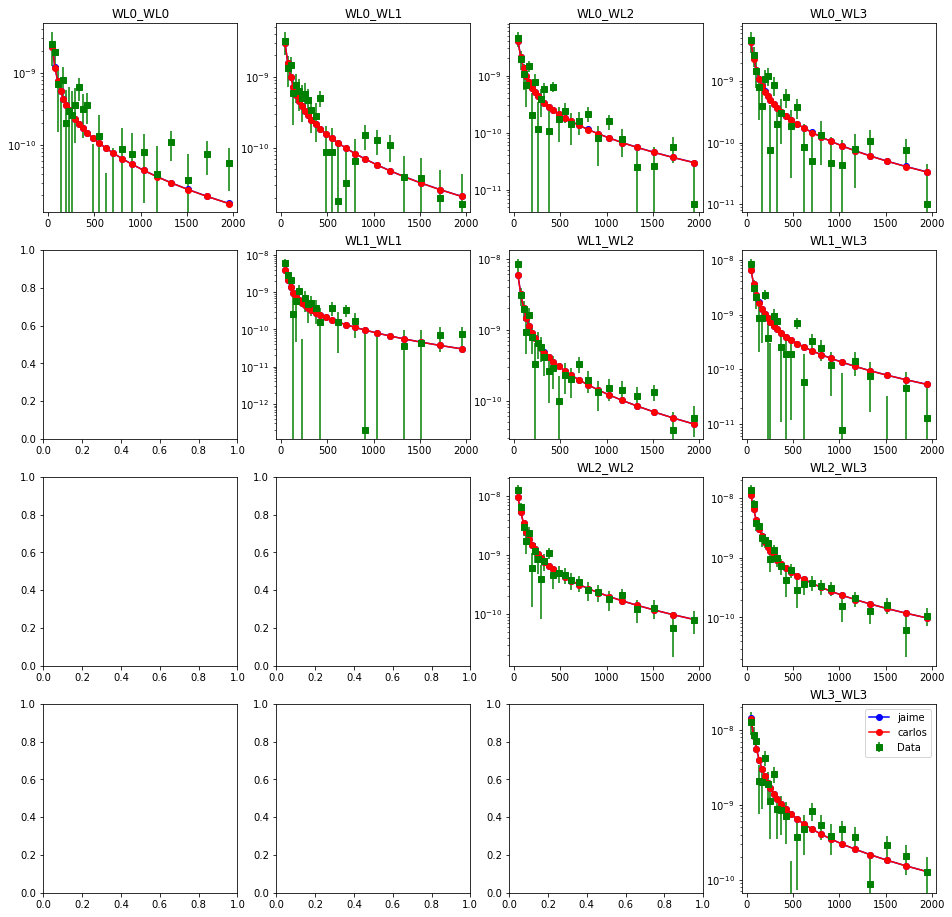

In [33]:
figure, axis = plt.subplots(4, 4, figsize=(16,16))
l = 25
for i in range(0,4):
    for j in range(0,4):
        if j >= i:
            axis[i, j].errorbar(files["ls_2{}2{}".format(i,j)], 
                     data[idx[l]:idx[l+1]], 
                     yerr=err[idx[l]:idx[l+1]], fmt='gs', label='Data')
            axis[i, j].plot(files["ls_2{}2{}".format(i,j)],
                            cls_jaime[idx[l]:idx[l+1]],
                            "bo-", label="jaime")
            axis[i, j].plot(files["ls_2{}2{}".format(i,j)],
                            cls_carlos['cls'][idx[l]:idx[l+1]],
                            "ro-", label="carlos")
            axis[i, j].set_title("WL{}_WL{}".format(i,j))
            axis[i, j].set_yscale("log")
            l += 1
plt.legend()
plt.show()